In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
nba = pd.read_csv('nba_final_scores.csv')
nba['OT'] = nba['OT'].fillna('')
# game number= game number +1? do i care?
nba = nba.drop(['Unnamed: 0'],axis=1)
nba

,Game Number,Date,Start (ET),Visitor,V_PTS,Home,H_PTS,OT,Attendence,Datetime,year,month,Season
0,0,"Tue, Oct 30, 2001",7:00p,Boston Celtics,108,Cleveland Cavaliers,89,,17748,2001-10-30,2001,10,2001/2002
1,1,"Tue, Oct 30, 2001",7:30p,Indiana Pacers,97,New Jersey Nets,103,,8749,2001-10-30,2001,10,2001/2002
2,2,"Tue, Oct 30, 2001",7:30p,Washington Wizards,91,New York Knicks,93,,19763,2001-10-30,2001,10,2001/2002
3,3,"Tue, Oct 30, 2001",7:30p,Toronto Raptors,85,Orlando Magic,114,,16088,2001-10-30,2001,10,2001/2002
4,4,"Tue, Oct 30, 2001",8:00p,Philadelphia 76ers,74,Minnesota Timberwolves,83,,18697,2001-10-30,2001,10,2001/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24775,73,"Tue, Mar 10, 2020",10:30p,Los Angeles Clippers,131,Golden State Warriors,107,,18064,2020-03-10,2020,3,2019/2020
24776,74,"Wed, Mar 11, 2020",7:00p,Detroit Pistons,106,Philadelphia 76ers,124,,20172,2020-03-11,2020,3,2019/2020
24777,75,"Wed, Mar 11, 2020",7:30p,New York Knicks,136,Atlanta Hawks,131,OT,15393,2020-03-11,2020,3,2019/2020
24778,76,"Wed, Mar 11, 2020",7:30p,Charlotte Hornets,109,Miami Heat,98,,19600,2020-03-11,2020,3,2019/2020


In [3]:
# Uncomment to see boxplots minus OTs
# Before = 24780, After = 23247
OT_games = nba.loc[(nba['OT'] == "OT") | (nba['OT'] == "2OT") | (nba['OT'] == "3OT") | (nba['OT'] == "4OT")].index
nba_no_OT = nba.drop(OT_games)
nba = nba_no_OT
nba

,Game Number,Date,Start (ET),Visitor,V_PTS,Home,H_PTS,OT,Attendence,Datetime,year,month,Season
0,0,"Tue, Oct 30, 2001",7:00p,Boston Celtics,108,Cleveland Cavaliers,89,,17748,2001-10-30,2001,10,2001/2002
1,1,"Tue, Oct 30, 2001",7:30p,Indiana Pacers,97,New Jersey Nets,103,,8749,2001-10-30,2001,10,2001/2002
2,2,"Tue, Oct 30, 2001",7:30p,Washington Wizards,91,New York Knicks,93,,19763,2001-10-30,2001,10,2001/2002
3,3,"Tue, Oct 30, 2001",7:30p,Toronto Raptors,85,Orlando Magic,114,,16088,2001-10-30,2001,10,2001/2002
4,4,"Tue, Oct 30, 2001",8:00p,Philadelphia 76ers,74,Minnesota Timberwolves,83,,18697,2001-10-30,2001,10,2001/2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24774,72,"Tue, Mar 10, 2020",10:30p,Brooklyn Nets,104,Los Angeles Lakers,102,,18997,2020-03-10,2020,3,2019/2020
24775,73,"Tue, Mar 10, 2020",10:30p,Los Angeles Clippers,131,Golden State Warriors,107,,18064,2020-03-10,2020,3,2019/2020
24776,74,"Wed, Mar 11, 2020",7:00p,Detroit Pistons,106,Philadelphia 76ers,124,,20172,2020-03-11,2020,3,2019/2020
24778,76,"Wed, Mar 11, 2020",7:30p,Charlotte Hornets,109,Miami Heat,98,,19600,2020-03-11,2020,3,2019/2020


In [4]:
# add W_PTS/L_PTS columns
for i, column in nba.iterrows():
    if (column[4] < column[6]):
        nba.at[i,'W_PTS'] = column[6]
        nba.at[i,'L_PTS'] = column[4]
    else:
        nba.at[i,'L_PTS'] = column[6]
        nba.at[i,'W_PTS'] = column[4]

In [5]:
h_scores_by_season_list = []
v_scores_by_season_list = []
i = 2001
for i in range(2001,2020,1):
    season = nba[nba['Season'] == f'{i}/{i+1}']['V_PTS']
    v_scores_by_season_list.append(season)
    season = nba[nba['Season'] == f'{i}/{i+1}']['H_PTS']
    h_scores_by_season_list.append(season)

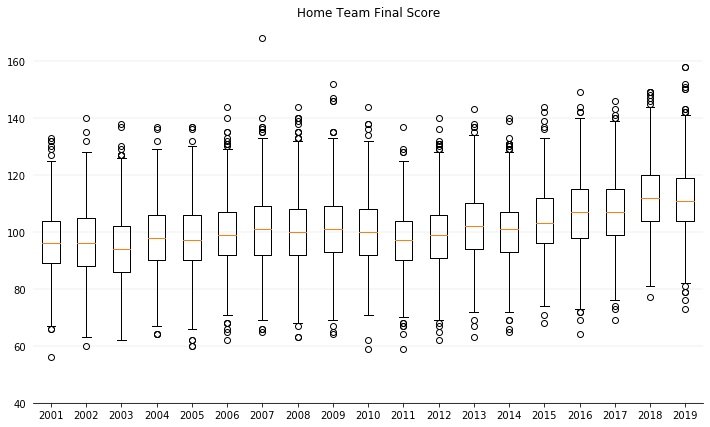

In [6]:
# boxplots
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Home Team Final Score')
# Set species names as labels for the boxplot, make more concise
labels = [*range(2001,2020,1)]
ax.boxplot(h_scores_by_season_list, labels=labels)
ax.set_ylim(ymin=40)
plt.show()

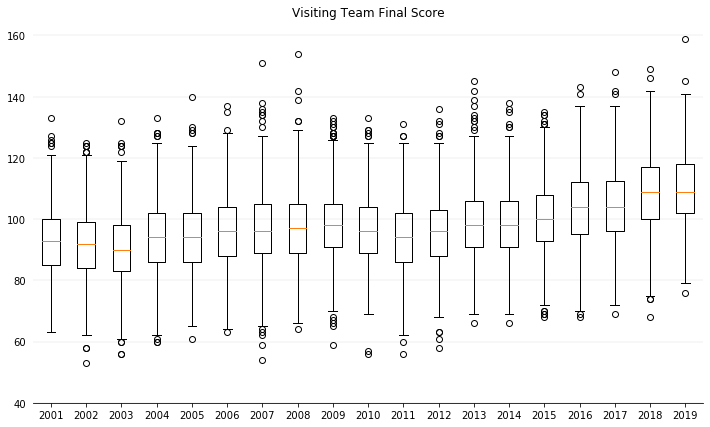

In [7]:
# boxplots
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Visiting Team Final Score')
# Set species names as labels for the boxplot, make more concise
labels = [*range(2001,2020,1)]
ax.boxplot(v_scores_by_season_list, labels=labels)
ax.set_ylim(ymin=40)
plt.show()

In [8]:
w_scores_by_season_list = []
l_scores_by_season_list = []
i = 2001
for i in range(2001,2020,1):
    season = nba[nba['Season'] == f'{i}/{i+1}']['W_PTS']
    w_scores_by_season_list.append(season)
    season = nba[nba['Season'] == f'{i}/{i+1}']['L_PTS']
    l_scores_by_season_list.append(season)

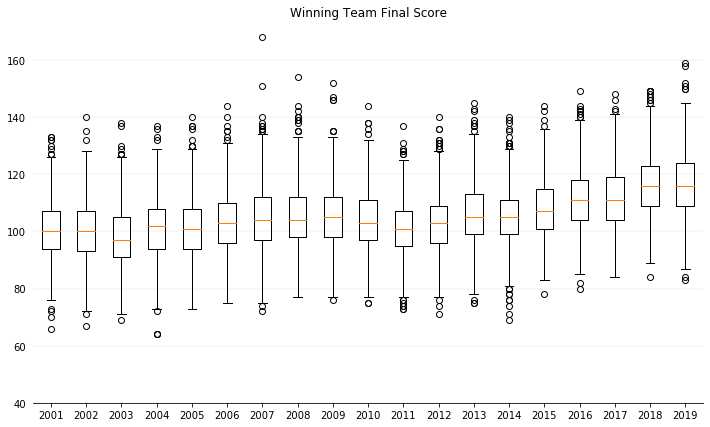

In [9]:
# boxplots
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Winning Team Final Score')
# Set species names as labels for the boxplot, make more concise
labels = [*range(2001,2020,1)]
ax.boxplot(w_scores_by_season_list, labels=labels)
ax.set_ylim(ymin=40)
plt.show()

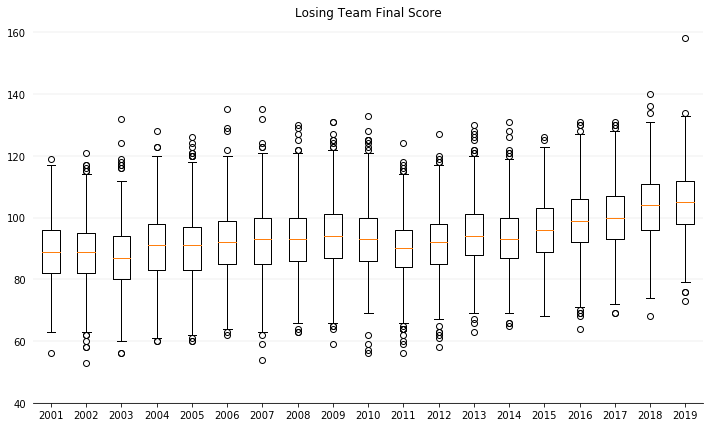

In [10]:
# boxplots
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
# Set plot title
ax.set_title('Losing Team Final Score')
# Set species names as labels for the boxplot, make more concise
labels = [*range(2001,2020,1)]
ax.boxplot(l_scores_by_season_list, labels=labels)
ax.set_ylim(ymin=40)
plt.show()